<a href="https://colab.research.google.com/github/jclase/CSC-302-HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/DATA/WorldCupMatches.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance 

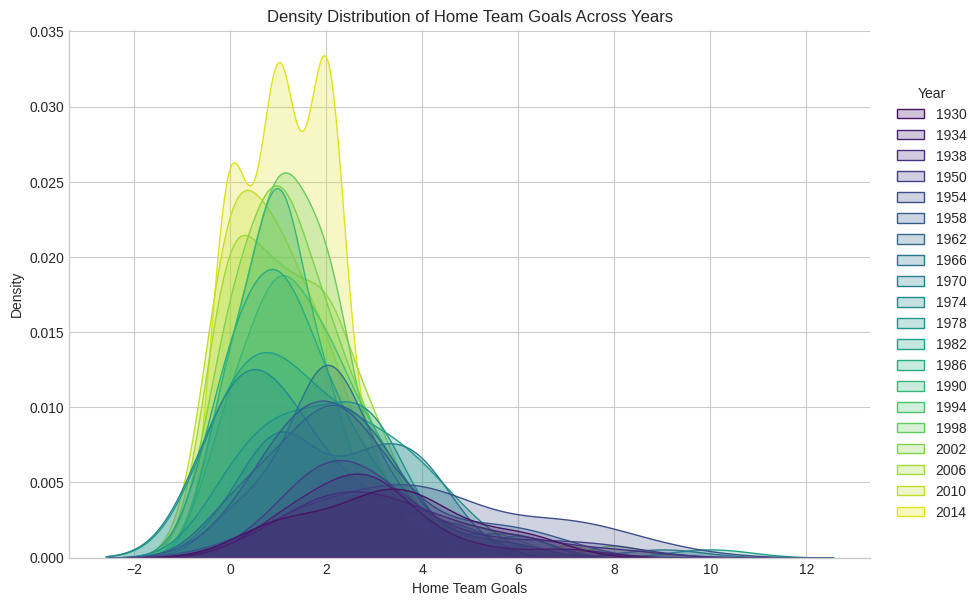

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/Colab Notebooks/DATA/WorldCupMatches.csv"
df = pd.read_csv(file_path)
df['Year'] = df['Year'].astype(str)
sns.displot(
    data=df,
    x="Home Team Goals",
    hue="Year",
    kind="kde",
    fill=True,
    palette="viridis",  # Color map
    height=6,
    aspect=1.5
)
plt.xlabel("Home Team Goals")
plt.ylabel("Density")
plt.title("Density Distribution of Home Team Goals Across Years")
plt.show()


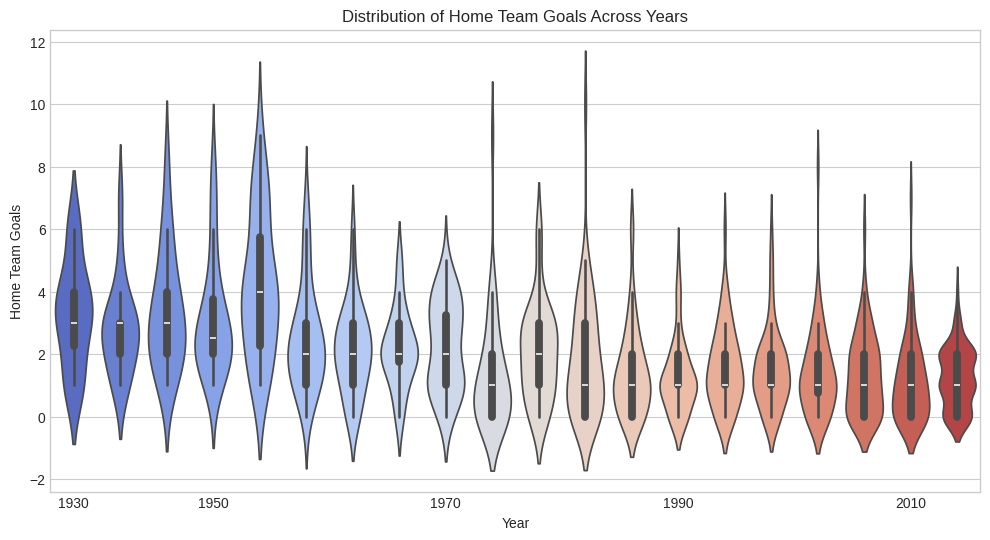

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/Colab Notebooks/DATA/WorldCupMatches.csv"
df = pd.read_csv(file_path)
df['Year'] = df['Year'].astype(str)
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df, x="Year", y="Home Team Goals", hue="Year", legend=False, palette="coolwarm")
years = sorted(df['Year'].unique())
labels = [year if year.endswith('0') else "" for year in years]
ax.set_xticks(range(len(years)))
ax.set_xticklabels(labels)
plt.xlabel("Year")
plt.ylabel("Home Team Goals")
plt.title("Distribution of Home Team Goals Across Years")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1200x800 with 0 Axes>

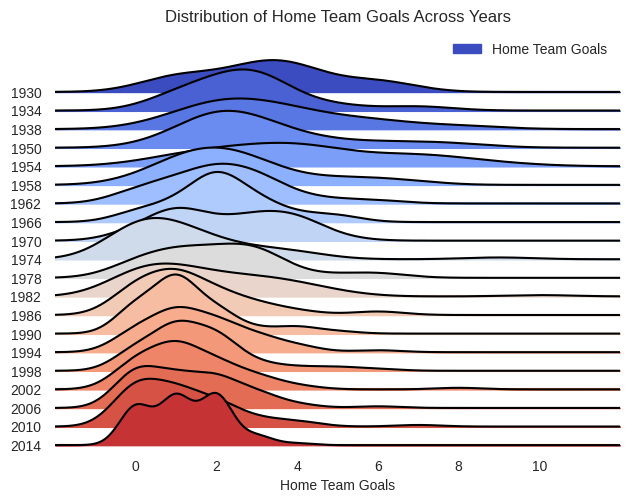

<Figure size 1200x800 with 0 Axes>

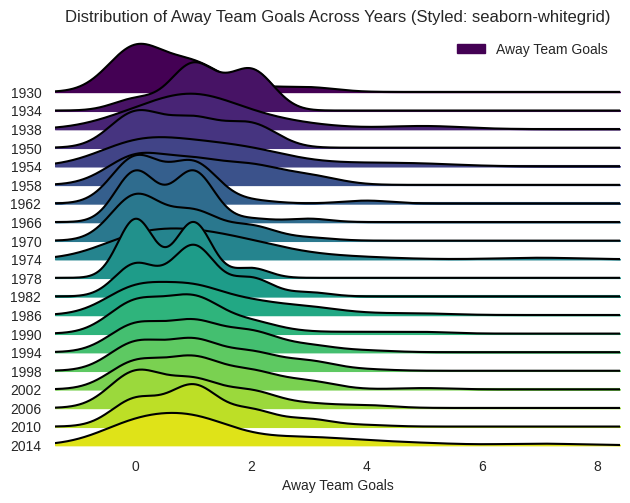

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot
file_path = "/content/drive/MyDrive/Colab Notebooks/DATA/WorldCupMatches.csv"
df = pd.read_csv(file_path)
df['Year'] = df['Year'].astype(str)
plt.figure(figsize=(12, 8))
joyplot(
    data=df,
    by="Year",
    column="Home Team Goals",
    colormap=plt.cm.coolwarm,
    legend=True
)
plt.xlabel("Home Team Goals")
plt.ylabel("Year")
plt.title("Distribution of Home Team Goals Across Years")
plt.show()
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
joyplot(
    data=df,
    by="Year",
    column="Away Team Goals",
    colormap=plt.cm.viridis,
    legend=True
)
plt.xlabel("Away Team Goals")
plt.ylabel("Year")
plt.title("Distribution of Away Team Goals Across Years (Styled: seaborn-whitegrid)")
plt.show()


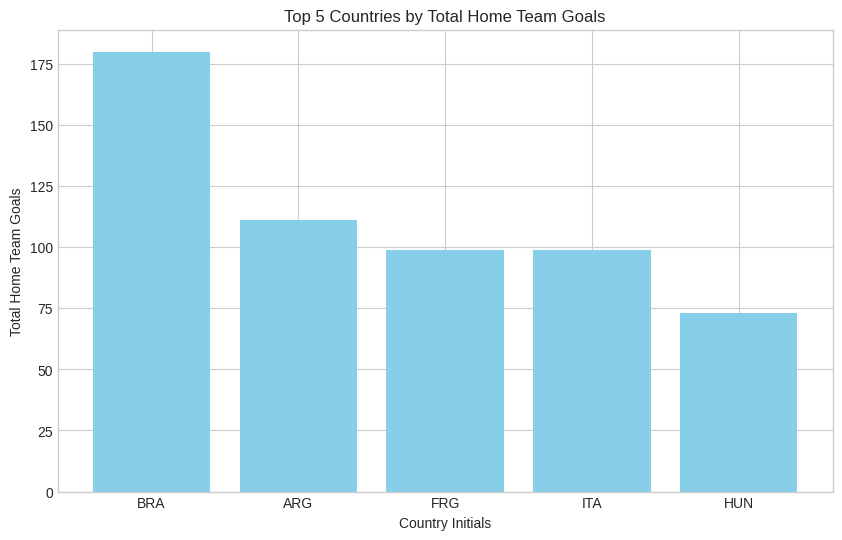

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/Colab Notebooks/DATA/WorldCupMatches.csv"
df = pd.read_csv(file_path)
home_goals_df = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()
top_5_countries = home_goals_df.sort_values(by='Home Team Goals', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['Home Team Initials'], top_5_countries['Home Team Goals'], color='skyblue')
plt.xlabel("Country Initials")
plt.ylabel("Total Home Team Goals")
plt.title("Top 5 Countries by Total Home Team Goals")
plt.show()

<Figure size 1200x800 with 0 Axes>

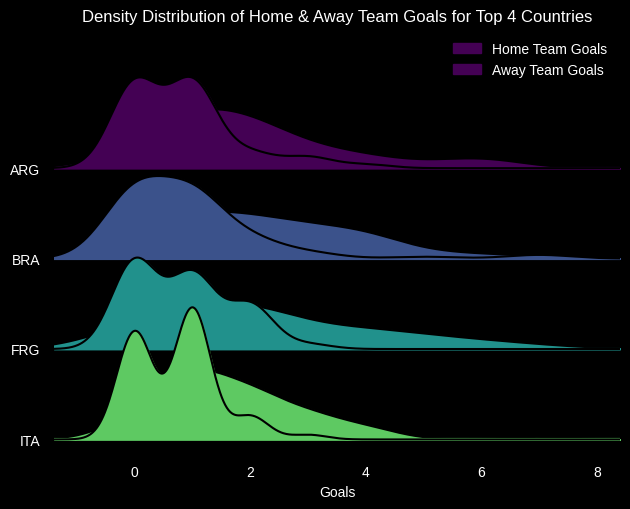

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot
file_path = "/content/drive/MyDrive/Colab Notebooks/DATA/WorldCupMatches.csv"
df = pd.read_csv(file_path)
home_goals_df = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()
top_4_countries = home_goals_df.sort_values(by='Home Team Goals', ascending=False).head(4)['Home Team Initials']
filtered_df = df[df['Home Team Initials'].isin(top_4_countries)]
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
joyplot(
    data=filtered_df,
    by="Home Team Initials",
    column=["Home Team Goals", "Away Team Goals"],
    colormap=plt.cm.viridis,
    legend=True
)
plt.xlabel("Goals")
plt.ylabel("Country Initials")
plt.title("Density Distribution of Home & Away Team Goals for Top 4 Countries")
plt.show()

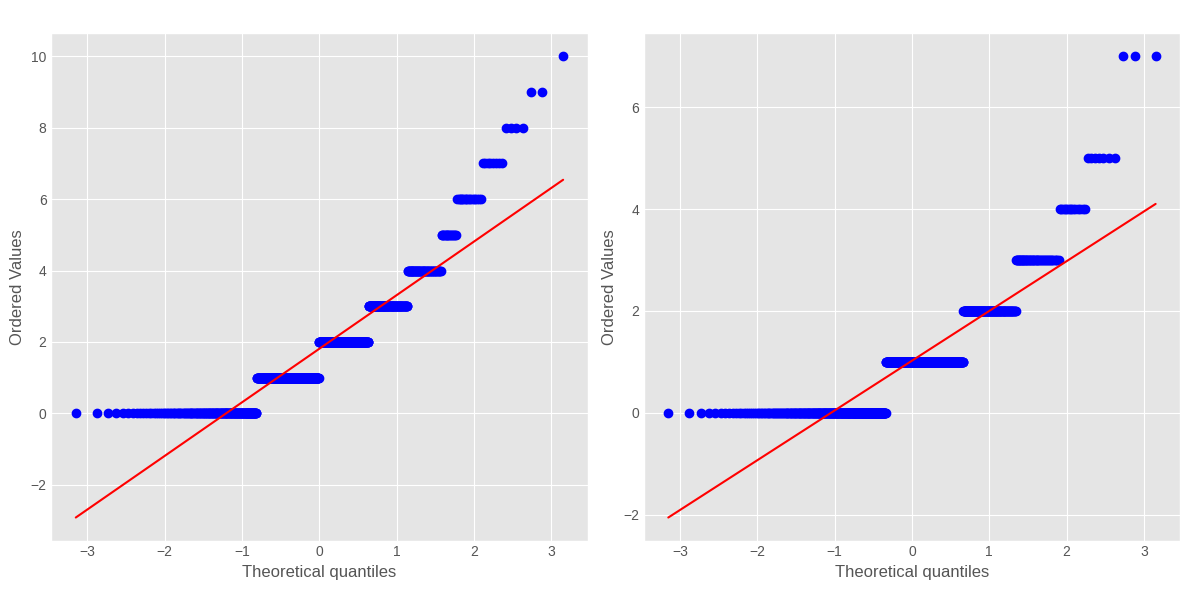

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
file_path = "/content/drive/MyDrive/Colab Notebooks/DATA/WorldCupMatches.csv"
df = pd.read_csv(file_path)
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
stats.probplot(df["Home Team Goals"].dropna(), dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot - Home Team Goals")
stats.probplot(df["Away Team Goals"].dropna(), dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot - Away Team Goals")
plt.tight_layout()
plt.show()
